In [6]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import os

In [18]:
datasets = {"agnews": 1, "mnli": 0, "yahoo": 5, "yelp-full": 0}

filenames = [
    "stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_1_1.log",
    "stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_1_10.log",
    "stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_5_1.log",
    "stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_5_10.log",
    "stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_10_1.log",
    "stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_10_10.log",
    "fedpet_64_32_roberta-large.log"
]

labels = ["1_1", "1_10", "5_1", "5_10", "10_1", "10_10","baseline"]

seed = 42

In [19]:
colors=['r','g','b','y','c','m','k']

/home/cdq/FedPet/log/agnews/all_1000/seed_42/pattern_1/alpha_1_beta_0_gamma_100/stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_1_1.log
max accuracy is 0.8981578947368422, round is 117
['1_1', '1_10', '5_1', '5_10', '10_1', '10_10', 'baseline'] 0
/home/cdq/FedPet/log/agnews/all_1000/seed_42/pattern_1/alpha_1_beta_0_gamma_100/stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_1_10.log
max accuracy is 0.8902631578947369, round is 135
['1_1', '1_10', '5_1', '5_10', '10_1', '10_10', 'baseline'] 1
/home/cdq/FedPet/log/agnews/all_1000/seed_42/pattern_1/alpha_1_beta_0_gamma_100/stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_5_1.log
max accuracy is 0.89, round is 68
['1_1', '1_10', '5_1', '5_10', '10_1', '10_10', 'baseline'] 2
/home/cdq/FedPet/log/agnews/all_1000/seed_42/pattern_1/alpha_1_beta_0_gamma_100/stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_5_10.log
max accuracy is 0.8964473684210527, round is 71
['1_1', '1_10', '5_1', '5_10', '10_1', '10_10', 'baselin

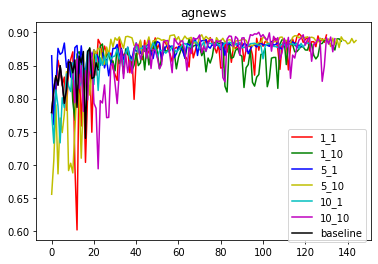

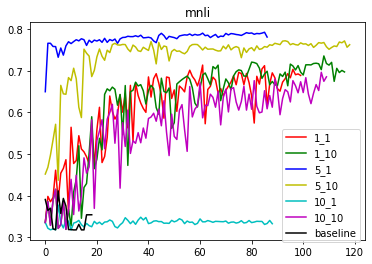

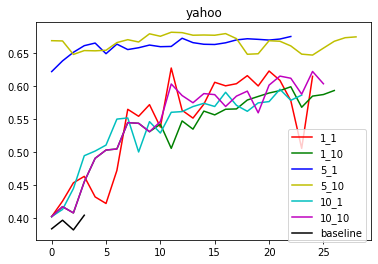

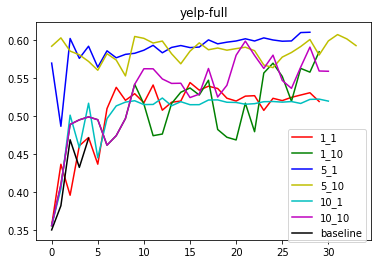

In [20]:
# round to accuracy
i=0
acc_list = {"agnews": [], "mnli": [], "yahoo": [], "yelp-full": []}
round_list = {"agnews": [], "mnli": [], "yahoo": [], "yelp-full": []}
for dataset in datasets:
    if dataset == "agnews":
        root_path = f"/home/cdq/FedPet/log/{dataset}/all_1000/seed_{seed}/pattern_{datasets[dataset]}/alpha_1_beta_0_gamma_100"
    else:
        root_path = f"/home/cdq/FedPet/log/{dataset}/all_1000/seed_{seed}/pattern_{datasets[dataset]}/alpha_0_beta_0_gamma_100"

    fig = plt.figure()
    plt.title(dataset)
    for filename in filenames:
            
        log_path = os.path.join(root_path, filename)
        if not os.path.exists(log_path):
            print(f"{log_path} not exists")
            continue


        # plt.title(log_path)
        iter = 1000
        phrase = 'aggregated model performance is'
        with open(log_path) as f:
            f = f.readlines()
        df = pd.DataFrame(data=None, index = range(iter), columns = range(1))
        for line in f:
            if phrase in line:
                gen = int(re.findall(r'Gen (.+?) ',line)[0])
                
                acc = float(re.findall(r': ?(\d+\.\d+)',line)[0])
                df[0][gen]=acc

        df = df.dropna(axis=0, how='any') # any 只要有 nan 就会删掉。 all　是必须全是nan才删除; 0: 行；1：列
        if df.empty:
            print(f"Bug: {log_path}")
            continue

        # print(filename)
        # print(df)
        this_max_acc = np.max(df[0])
        idx = [df[0].to_list().index(x) for x in df[0] if x == this_max_acc][0]
        print(log_path)
        print(f"max accuracy is {this_max_acc}, round is {idx}")
        acc_list[dataset].append(this_max_acc)
        round_list[dataset].append(idx)
        # df.to_csv("/Users/cdq/Desktop/opensource/FedPrompt/data/softlabel/agnews_aug_fedpet_128_32_roberta-large.csv")
        iter = len(df.index)
        y_mean = []
        for j in range(iter):
            y = np.array(df.iloc[j])

            y_mean.append(pd.DataFrame(y).dropna().mean())
            # plt.scatter(j, y)
        print(labels, filenames.index(filename))
        plt.plot(range(iter),y_mean,label=labels[filenames.index(filename)],color=colors[filenames.index(filename)])
    fig.legend(loc="lower right",bbox_to_anchor=(0.9,0.1),bbox_transform=fig.transFigure)
    fig.savefig(f"../fig/a{i}.png")
    i = i+1

/home/cdq/FedPet/log/agnews/all_1000/seed_42/pattern_1/alpha_1_beta_0_gamma_100/stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_1_1.log
max accuracy is 0.8981578947368422, runtime is 41316.0
131 131
/home/cdq/FedPet/log/agnews/all_1000/seed_42/pattern_1/alpha_1_beta_0_gamma_100/stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_1_10.log
max accuracy is 0.8902631578947369, runtime is 5107.0
138 138
/home/cdq/FedPet/log/agnews/all_1000/seed_42/pattern_1/alpha_1_beta_0_gamma_100/stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_5_1.log
max accuracy is 0.89, runtime is 43622.5
120 119
/home/cdq/FedPet/log/agnews/all_1000/seed_42/pattern_1/alpha_1_beta_0_gamma_100/stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_5_10.log
max accuracy is 0.8964473684210527, runtime is 8387.5
146 145
/home/cdq/FedPet/log/agnews/all_1000/seed_42/pattern_1/alpha_1_beta_0_gamma_100/stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_10_1.log
max accuracy is 0.8868421052631579, runti

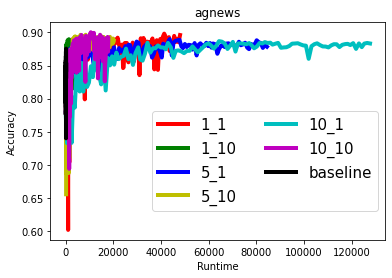

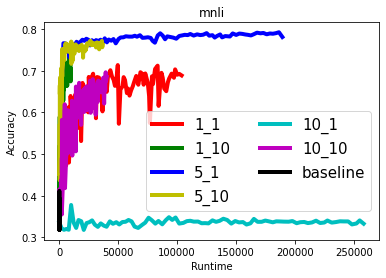

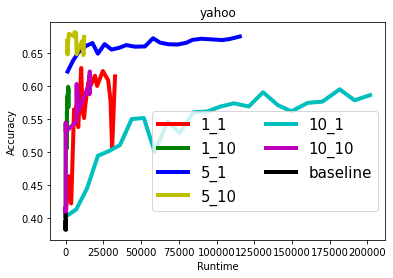

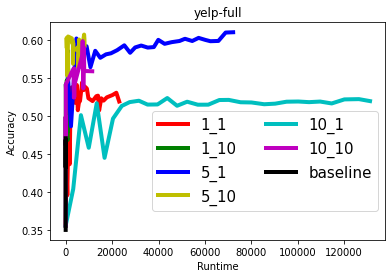

In [21]:
# time to accuracy  
t = 0   
acc_list = {"agnews": [], "mnli": [], "yahoo": [], "yelp-full": []}
runtime_list = {"agnews": [], "mnli": [], "yahoo": [], "yelp-full": []}     
for dataset in datasets:
    if dataset == "agnews":
        root_path = f"/home/cdq/FedPet/log/{dataset}/all_1000/seed_{seed}/pattern_{datasets[dataset]}/alpha_1_beta_0_gamma_100"
    else:
        root_path = f"/home/cdq/FedPet/log/{dataset}/all_1000/seed_{seed}/pattern_{datasets[dataset]}/alpha_0_beta_0_gamma_100"
    fig = plt.figure()
    plt.title(dataset)
    plt.xlabel("Runtime")
    plt.ylabel("Accuracy")
    for filename in filenames:

        log_path = os.path.join(root_path, filename)
        if not os.path.exists(log_path):
            print(f"{log_path} not exists")
            continue

        iter = 1000
        phrase = 'train data'
        with open(log_path) as f:
            f = f.readlines()
        df = pd.DataFrame(data=None, index = range(iter), columns = range(1))
        runtime = []
        train_runtime = []
        infer_runtime = []
        time_stamp = 0
        train_time_stamp = 0
        infer_time_stamp = 0

        for line in f:
            if phrase in line:
                line_idx = f.index(line)
                
                train_info = f[line_idx]
                infer_info = f[line_idx + 1]
                
                # TX2: train, 1s/sample, infer, 0.5s/sample
                train_time = sum(list(map(int, re.findall(r'\d+', train_info.split("Gen")[1])))[1:]) * 1 
                infer_time = sum(list(map(int, re.findall(r'\d+', infer_info.split("Gen")[1])))[1:]) * 0.5
                
                time_stamp = time_stamp + train_time + infer_time # elasped time of all clients / energy consumption
                train_time_stamp = train_time + train_time_stamp
                infer_time_stamp = infer_time + infer_time_stamp

                runtime.append(time_stamp)
                train_runtime.append(train_time_stamp)
                infer_runtime.append(infer_time_stamp)
            if 'aggregated model performance is' in line: 
                gen = int(re.findall(r'Gen (.+?) ',line)[0])
                
                acc = float(re.findall(r': ?(\d+\.\d+)',line)[0])
                df[0][gen]=acc

        df = df.dropna(axis=0, how='any') # any 只要有 nan 就会删掉。 all　是必须全是nan才删除; 0: 行；1：列
        if df.empty:
            print(f"Bug: {log_path}")

        this_max_acc = np.max(df[0])
        idx = [df[0].to_list().index(x) for x in df[0] if x == this_max_acc][0]
        print(log_path)
        print(f"max accuracy is {this_max_acc}, runtime is {runtime[idx]}")
        acc_list[dataset].append(this_max_acc)
        runtime_list[dataset].append(runtime[idx])
        # df.to_csv("/Users/cdq/Desktop/opensource/FedPrompt/data/softlabel/agnews_aug_fedpet_128_32_roberta-large.csv")
        iter = len(df.index)
        y_mean = []
        for j in range(iter):
            y = np.array(df.iloc[j])

            y_mean.append(pd.DataFrame(y).dropna().mean())
            # plt.scatter(j, y)
        print(len(runtime),len(list(map(float, y_mean))))
        plt.plot(runtime[:len(y_mean)],y_mean,label=labels[filenames.index(filename)],color=colors[filenames.index(filename)],linewidth=4)
    fig.legend(loc="lower right",bbox_to_anchor=(0.9,0.2),bbox_transform=fig.transFigure,ncol=2,fontsize=15)
    fig.savefig(f"../fig/b{t}.png")
    t = t+1

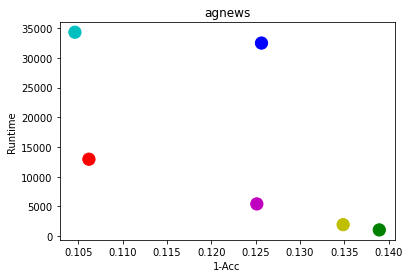

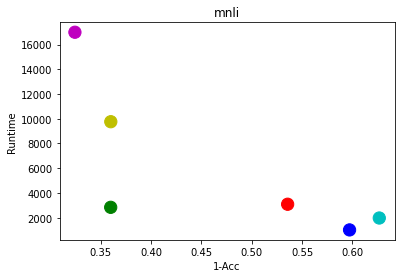

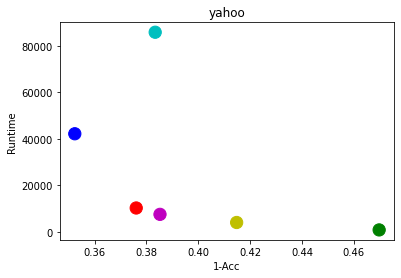

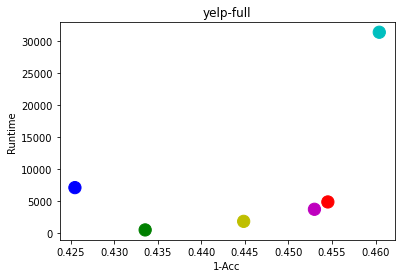

In [16]:
c=0
for dataset in datasets:
    fig = plt.figure()
    plt.title(f"{dataset}")
    plt.xlabel("1-Acc")
    plt.ylabel("Runtime")
    plt.scatter(1- np.array(acc_list[dataset]), np.array(runtime_list[dataset]),s=150,color=['r','g','b','y','c','m'])
    plt.savefig(f"../fig/c{c}.png")
    c=c+1